In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
import os
print(os.listdir("./digit-recognizer"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [11]:
# load in training data

train = pd.read_csv("./digit-recognizer/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# load in test data

test = pd.read_csv("./digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# using label column to create Y_train

Y_train = train["label"]

# create X_train and drop label column

X_train = train.drop(labels=["label"],axis=1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

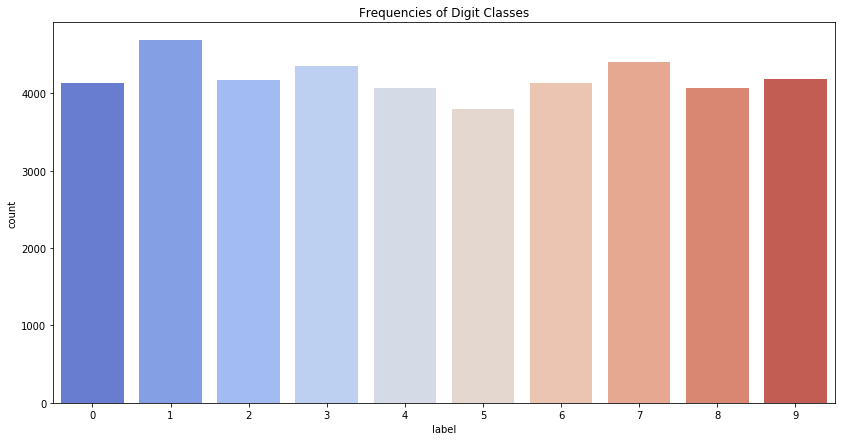

In [14]:
# visualize digit class frequencies

plt.figure(figsize=(14,7))
counts = sns.countplot(Y_train, palette="coolwarm")
plt.title("Frequencies of Digit Classes")
Y_train.value_counts()

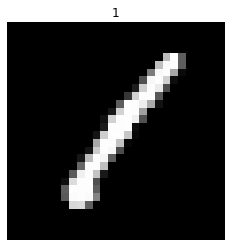

In [15]:
#first sample image

sample_img1 = X_train.iloc[0].to_numpy()
sample_img1 = sample_img1.reshape((28,28))
plt.imshow(sample_img1,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

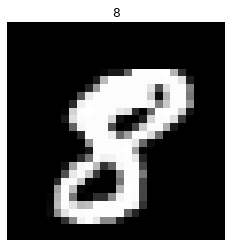

In [16]:
#second sample image

sample_img2 = X_train.iloc[10].to_numpy()
sample_img2 = sample_img2.reshape((28,28))
plt.imshow(sample_img2,cmap='gray')
plt.title(train.iloc[10,0])
plt.axis("off")
plt.show()

**Normalizing, Reshaping, and Label Encoding**
All operations are critical to being able to feed in appropriate data sto the CNN.

Normalization: We'll do a grayscale normalization to change the range of pixel intensity values.
Reshape: We'll reshape our data to 28 x 28 x 1 3D matrices. The 1 is the channel – grayscaled images use one channel, while color images use 3 (RGB)
Label Encoding: We'll encode labels to one hot vectors

In [17]:
# normalization

X_train = X_train / 255.0
test = test / 255.0
print(X_train.shape)
print(test.shape)

(42000, 784)
(28000, 784)


In [25]:
# reshape

X_train = X_train.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)
print("X_train shape: ",X_train.shape)
print("test shape: ",test.shape)


X_train shape:  (37800, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


**Splitting into training and testing sets**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

NameError: name 'X_train' is not defined

**Building our NN**

We'll use Keras to build our CNN. We'll also use dropout, a regularization technique where randomly selected neurons are ignored during training. We'll choose adam for our optimizer, and then compile the model using categorical cross entropy.

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

#choose an epoch size of 15 and batch size of 100
epochs = 15
batch_size = 300

#Data augmentation to avoid overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

**Evaluate the model by calculating y-pred and making a confusion matrix**


In [ ]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()